# Monthly Calender Rebalance

[*********************100%***********************]  4 of 4 completed


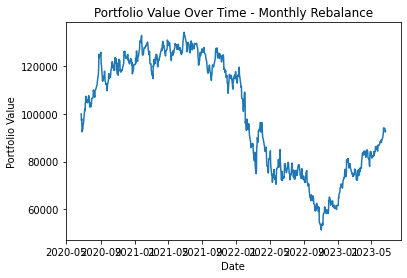

In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the tickers and weights
tickers = ['TSLA', 'BABA', 'META', 'JPM']


# Download historical stock data
data = yf.download(tickers, period='3y', auto_adjust=True)
price = data['Close']

# Calculate daily returns
returns = price.pct_change()

# Create a DataFrame to store portfolio values
portfolio_value = pd.DataFrame(index=returns.index, columns=['Monthly_Rebalance_MV','DCA_MV'])

# Set the initial portfolio value
portfolio_value['Monthly_Rebalance_MV'].iloc[0] = 100000
portfolio_value['Allocation%'] = ''
portfolio_value['Rebalance_Indicator'] = ''

# Initialize the target weights, initial allocation for rebalancing
w0 = np.array([0.3, 0.2, 0.4, 0.1])
target_weights = w0
allocation = w0 * 100000


# Iterate over each trading day for rebalancing
for i in range(1, len(portfolio_value)):
    # Check if it's the first trading day of the month
    if portfolio_value.index[i].month != portfolio_value.index[i - 1].month:
        # Calculate the allocation based on target weights
        allocation = portfolio_value['Monthly_Rebalance_MV'].iloc[i - 1] * target_weights
        portfolio_value['Rebalance_Indicator'].iloc[i] = 'Rebalance'
    else:
        allocation = (returns.iloc[i] + 1) * allocation
    
    portfolio_value['Allocation%'].iloc[i-1] = np.round(allocation/np.sum(allocation),2)
    # Update the portfolio value for the current day
    portfolio_value['Monthly_Rebalance_MV'].iloc[i] = np.sum(allocation)

# Plot the portfolio value over time
plt.plot(portfolio_value.index, portfolio_value['Monthly_Rebalance_MV'])
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time - Monthly Rebalance')
plt.show()

# Dollar Cost Average

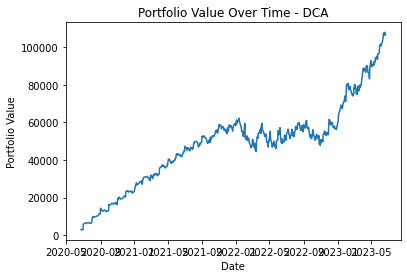

In [16]:
portfolio_value['DCA_MV'].iloc[0] = 3000
portfolio_value['DCA_indicator'] = ''
portfolio_value['Allocation%2'] = ''
dca_amount = 3000
count = 0
allocation = w0 * 3000


for i in range(1, len(portfolio_value)):
    # Check if it's the first trading day of the month
    if portfolio_value.index[i].month != portfolio_value.index[i - 1].month:
        # Calculate the allocation based on target weights
        allocation = allocation + dca_amount * w0
        portfolio_value['DCA_indicator'].iloc[i] = 'DCA'
        count += 1
    else:
        allocation = (returns.iloc[i] + 1) * allocation
    
    portfolio_value['Allocation%2'].iloc[i-1] = np.round(allocation/np.sum(allocation),2)
    # Update the portfolio value for the current day
    portfolio_value['DCA_MV'].iloc[i] = np.sum(allocation)
    
    if count == 50: #if dca for 50 month
        break

    
# Plot the portfolio value over time
plt.plot(portfolio_value.index, portfolio_value['DCA_MV'])
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time - DCA')
plt.show()